#Observation

#1 The closer you get to the equator the hotter the temperature is.  This can be seen in the graph titled 'City Latitude v. Max Temperature'.  When viewing the graph you can see on the x-axis that the closer you are to zero the higher the max temperature is. 

#2 Wind speed stays at 20mph or less for most of the sample cities.  This can be seen in the graph titled 'City Latitude v Wind Speed'. When looking at the graph you can see on the y-axis at 20mph that most of the dots are below 20mph. 

#3 There is a clustering of humid cities in the northern hemisphere.  This can be seen in the graph titled 'City Latitude v Humidity'. Observe how between 40degrees and 80degrees there is a cluster of points with high amounts of humidity with heavy collection of dots above 80% humidity. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
#import api_key
from config import api_key

In [3]:
#from citipy import citipy
from citipy import citipy
temp = 'imperial'
url='http://api.openweathermap.org/data/2.5/weather?'

In [4]:
output_data ='Output/weather.csv'

In [5]:
#one call to get the variable names for the for loop
query_url = f'{url}appid={api_key}&units={temp}&q='


In [6]:
#range of lat and long
lat = (-90,90)
long = (-180,180)

In [7]:
lat_longs = []
cities = []

lats = np.random.uniform(lat[0],lat[1],size=1500)
longs = np.random.uniform(long[0],long[1],size=1500)
lat_longs = zip(lats, longs)

for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
len(cities)

593

In [8]:
cities

['tuktoyaktuk',
 'samusu',
 'hasaki',
 'port lavaca',
 'saskylakh',
 'broken hill',
 'punta arenas',
 'mataura',
 'baindur',
 'rikitea',
 'ushuaia',
 'ajdabiya',
 'ancud',
 'fortuna',
 'kenai',
 'pangnirtung',
 'albany',
 'ust-kuyga',
 'tuatapere',
 'qovlar',
 'nikolskoye',
 'port hardy',
 'taolanaro',
 'chuy',
 'puerto ayora',
 'lorengau',
 'bethel',
 'saint-francois',
 'turukhansk',
 'atuona',
 'lagoa',
 'bichura',
 'bathsheba',
 'barranca',
 'mys shmidta',
 'grand river south east',
 'beringovskiy',
 'vaini',
 'tiksi',
 'polonnaruwa',
 'vaitupu',
 'jamestown',
 'cape town',
 'arraial do cabo',
 'kahului',
 'castro',
 'pontal do parana',
 'fallon',
 'flinders',
 'nianzishan',
 'sidi ali',
 'sinazongwe',
 'erenhot',
 'yellowknife',
 'mocuba',
 'longyearbyen',
 'barentsburg',
 'albertville',
 'norman wells',
 'kaspiyskiy',
 'bairiki',
 'bluff',
 'carlsbad',
 'hermanus',
 'fernie',
 'port alfred',
 'nuuk',
 'illoqqortoormiut',
 'khatanga',
 'pandan',
 'naze',
 'mahebourg',
 'almenara',


In [9]:
#may need to add this time.sleep(50) inorder to not get blocked by weather api
cities_two = []
cloudiness = []
dates = []
humidity = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
country = []

#count quantities to make sure group not over 5
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url+city).json()
        cloudiness.append(response['clouds']['all'])
        dates.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        if count_one >48:
            count_one =1
            set_one+=1
            cities_two.append(city)
        else:
            count_one +=1
            cities_two.append(city)
        print(f'{count_one} of {set_one}|{city}')
    except:
        print('Not found')


1 of 1|tuktoyaktuk
Not found
2 of 1|hasaki
3 of 1|port lavaca
4 of 1|saskylakh
5 of 1|broken hill
6 of 1|punta arenas
7 of 1|mataura
8 of 1|baindur
9 of 1|rikitea
10 of 1|ushuaia
11 of 1|ajdabiya
12 of 1|ancud
13 of 1|fortuna
14 of 1|kenai
15 of 1|pangnirtung
16 of 1|albany
17 of 1|ust-kuyga
18 of 1|tuatapere
19 of 1|qovlar
20 of 1|nikolskoye
21 of 1|port hardy
Not found
22 of 1|chuy
23 of 1|puerto ayora
24 of 1|lorengau
25 of 1|bethel
26 of 1|saint-francois
27 of 1|turukhansk
28 of 1|atuona
29 of 1|lagoa
30 of 1|bichura
31 of 1|bathsheba
32 of 1|barranca
Not found
Not found
33 of 1|beringovskiy
34 of 1|vaini
35 of 1|tiksi
36 of 1|polonnaruwa
Not found
37 of 1|jamestown
38 of 1|cape town
39 of 1|arraial do cabo
40 of 1|kahului
41 of 1|castro
42 of 1|pontal do parana
43 of 1|fallon
44 of 1|flinders
45 of 1|nianzishan
46 of 1|sidi ali
47 of 1|sinazongwe
48 of 1|erenhot
49 of 1|yellowknife
1 of 2|mocuba
2 of 2|longyearbyen
Not found
3 of 2|albertville
4 of 2|norman wells
5 of 2|kaspiyskiy

19 of 10|palana
Not found
20 of 10|sao filipe
21 of 10|rio grande
22 of 10|muros
23 of 10|nalut
24 of 10|jamame
25 of 10|awjilah
26 of 10|ampanihy
27 of 10|villagarzon
28 of 10|san carlos de bariloche
29 of 10|iberia
30 of 10|pangoa
31 of 10|plettenberg bay
Not found
32 of 10|sitka
33 of 10|silvino lobos
34 of 10|huruta
35 of 10|nouadhibou
36 of 10|mount abu
Not found
37 of 10|chipping sodbury
Not found
38 of 10|manta
39 of 10|nhulunbuy
40 of 10|synya
41 of 10|olafsvik
42 of 10|antofagasta
43 of 10|puerto escondido
44 of 10|aquiraz
45 of 10|faya
46 of 10|terra santa
47 of 10|onega
48 of 10|roma
49 of 10|cedar city
1 of 11|palmito
2 of 11|urucui
Not found
Not found
3 of 11|calvinia
Not found
4 of 11|biak
5 of 11|alyangula
6 of 11|finnsnes
7 of 11|leiyang
8 of 11|honiara
9 of 11|biltine
10 of 11|portland
11 of 11|boyolangu
12 of 11|nizwa
13 of 11|laredo
14 of 11|brandfort
15 of 11|prince rupert
16 of 11|tateyama
17 of 11|alugan
18 of 11|petropavlovsk-kamchatskiy
19 of 11|golovchino
Not f

In [10]:
#datacheck
len(cities_two)

546

In [11]:
#datacheck
len(cloudiness)

546

In [12]:
#datacheck
len(dates)

546

In [13]:
#create dictionary and then pd.dataframe
weather_dic={'City':cities_two,'Lat':lats,'Lng':lngs,'Max Temp':max_temps,'Humidity':humidity,
            'Cloudiness':cloudiness,'Wind Speeds':wind_speeds,'Country':country,'Date':dates}
weather =pd.DataFrame(weather_dic)
weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speeds,Country,Date
0,tuktoyaktuk,69.45,-133.04,2.16,91,83,7.38,CA,1604145470
1,hasaki,35.73,140.83,46.40,93,20,1.12,JP,1604145470
2,port lavaca,28.61,-96.63,61.00,75,1,4.70,US,1604145340
3,saskylakh,71.92,114.08,-2.92,85,1,5.79,RU,1604145470
4,broken hill,-31.95,141.43,60.80,67,0,7.31,AU,1604145470


In [14]:
weather.to_csv(output_data)

In [15]:
#data check to make sure all date for each city was added and some descriptive stats
weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speeds,Date
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,5.460000e+02
mean,20.682125,16.799414,58.546374,70.710623,50.135531,8.321209,1.604145e+09
std,33.200388,91.800304,24.179311,22.495108,39.097760,5.811066,6.306498e+01
min,-54.800000,-175.200000,-13.250000,9.000000,0.000000,0.430000,1.604145e+09
25%,-5.962500,-66.907500,42.800000,61.000000,2.000000,4.307500,1.604145e+09
50%,25.405000,25.115000,63.645000,77.000000,51.500000,6.930000,1.604145e+09
75%,48.412500,96.617500,78.485000,87.000000,90.000000,11.312500,1.604146e+09
max,78.220000,179.320000,98.650000,100.000000,100.000000,40.260000,1.604146e+09


In [16]:
#not cities with humidity over 100

weather.loc[weather['Humidity']>100]


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speeds,Country,Date


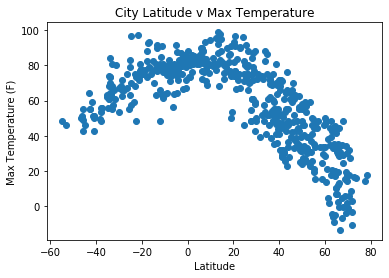

Scatter plot above shows the relationship between latitude and max temperature.


<Figure size 432x288 with 0 Axes>

In [34]:
#scatter plot latitude vs temperatur plot
plt.scatter(weather['Lat'], weather['Max Temp'])
plt.title('City Latitude v Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

plt.savefig('City Latitude v Temperature.png')

print('Scatter plot above shows the relationship between latitude and max temperature.')

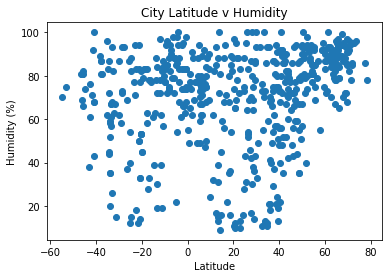

Scatter plot above shows the relationship between latitude and humidity.


<Figure size 432x288 with 0 Axes>

In [35]:
#scatter latitude vs humidity plot
plt.scatter(weather['Lat'], weather['Humidity'])
plt.title('City Latitude v Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

plt.savefig('City Latitude v Humidity.png')

print('Scatter plot above shows the relationship between latitude and humidity.')

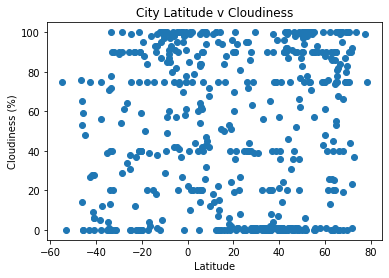

Scatter plot above shows the relationship between latitude and cloudiness.


<Figure size 432x288 with 0 Axes>

In [36]:
#scatter latitude vs. cloudiness plot
plt.scatter(weather['Lat'],weather['Cloudiness'])
plt.title('City Latitude v Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

plt.savefig('City Latitude v Cloudiness.png')

print('Scatter plot above shows the relationship between latitude and cloudiness.')

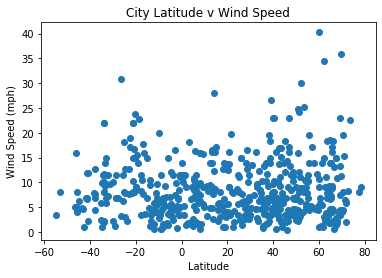

Scatter plot above shows the relationship between latitude and wind speed.


<Figure size 432x288 with 0 Axes>

In [37]:
#scatter latitude vs. wind speed plot
plt.scatter(weather['Lat'],weather['Wind Speeds'])
plt.title('City Latitude v Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

plt.savefig('City Latitude v Wind Speed.png')

print('Scatter plot above shows the relationship between latitude and wind speed.')

In [23]:
#creating north and south hemisphere
north = weather.loc[(weather['Lat'].astype(float)>=0.0),:]
south = weather.loc[(weather['Lat'].astype(float)<0.0),:]

In [24]:
#make sure seperate
north.count()

City           379
Lat            379
Lng            379
Max Temp       379
Humidity       379
Cloudiness     379
Wind Speeds    379
Country        379
Date           379
dtype: int64

In [25]:
#make sure seperate
south.count()

City           167
Lat            167
Lng            167
Max Temp       167
Humidity       167
Cloudiness     167
Wind Speeds    167
Country        167
Date           167
dtype: int64

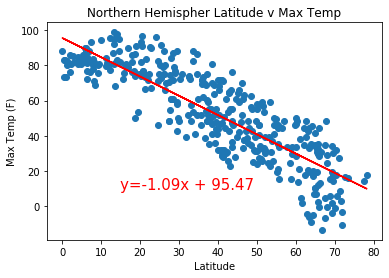

Linear Regression above shows the relationship between cities in the northern hemisphere and max temperature.


In [26]:
#linear regression Northern Hemisphere -Max temp vs Latitude
x_values = north['Lat']
y_values = north['Max Temp']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
#stay
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 15, color='red')
plt.title('Northern Hemispher Latitude v Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.show()

print('Linear Regression above shows the relationship between cities in the northern hemisphere and max temperature.')

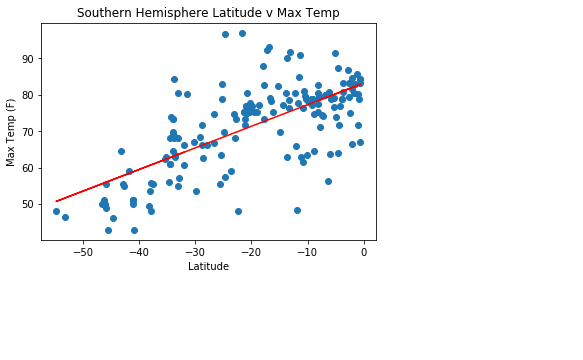

Linear Regression above shows the relationship between cities in the southern hemisphere and max temperature.


In [27]:
#linear regression southern hemisphere -max temp vs latitude
x_values = south['Lat']
y_values = south['Max Temp']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 15, color='red')
plt.title('Southern Hemisphere Latitude v Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.show()

print('Linear Regression above shows the relationship between cities in the southern hemisphere and max temperature.')

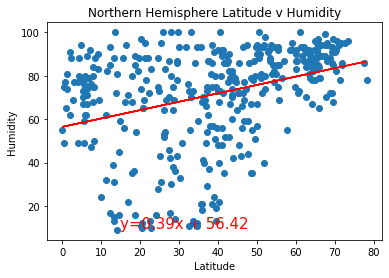

Linear Regression above shows the relationship between cities in the northern hemisphere and humidity.


In [28]:
#linear regression northern hemisphere latitude v humidity
x_values = north['Lat']
y_values = north['Humidity']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 15, color='red')
plt.title('Northern Hemisphere Latitude v Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

print('Linear Regression above shows the relationship between cities in the northern hemisphere and humidity.')

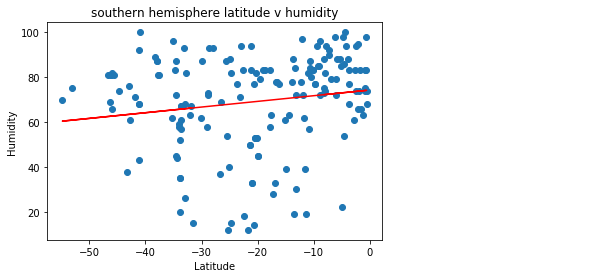

Linear Regression above shows the relationship between cities in the southern hemisphere and humidity.


In [29]:
#linear regression southern hemisphere latitude v humidity
x_values = south['Lat']
y_values = south['Humidity']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 15, color='red')
plt.title('southern hemisphere latitude v humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

print('Linear Regression above shows the relationship between cities in the southern hemisphere and humidity.')

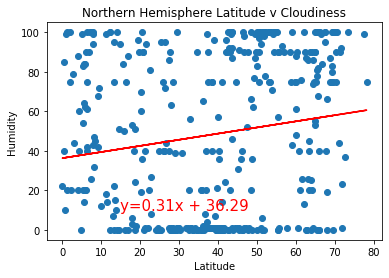

Linear Regression above shows the relationship between cities in the northern hemisphere and cloudiness.


In [30]:
#linear regression northern hemisphere latitude v cloudiness
x_values = north['Lat']
y_values = north['Cloudiness']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 15, color='red')
plt.title('Northern Hemisphere Latitude v Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

print('Linear Regression above shows the relationship between cities in the northern hemisphere and cloudiness.')

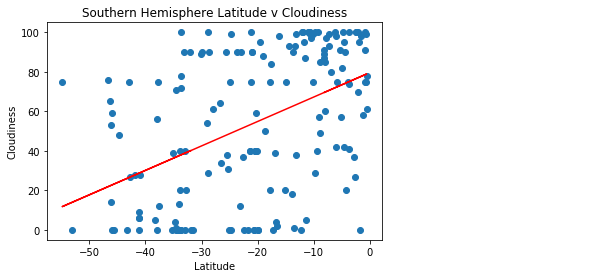

Linear Regression above shows the relationship between cities in the southern hemisphere and cloudiness.


In [31]:
#linear regression southern hemisphere latitude v cloudiness
x_values = south['Lat']
y_values = south['Cloudiness']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 15, color='red')
plt.title('Southern Hemisphere Latitude v Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

print('Linear Regression above shows the relationship between cities in the southern hemisphere and cloudiness.')

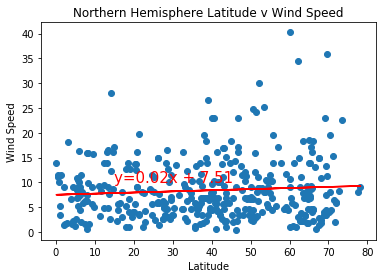

Linear Regression above shows the relationship between cities in the northern hemisphere and wind speed.


In [32]:
#linear regression northern hemisphere latitude v wind speed
x_values = north['Lat']
y_values = north['Wind Speeds']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 15, color='red')
plt.title('Northern Hemisphere Latitude v Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

print('Linear Regression above shows the relationship between cities in the northern hemisphere and wind speed.')

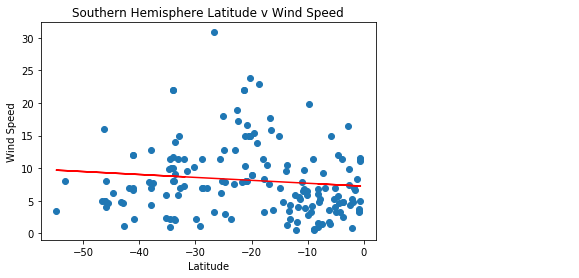

Linear Regression above shows the relationship between cities in the southern hemisphere and wind speed.


In [33]:
#linear regression southern hemisphere latitude v wind speed
x_values = south['Lat']
y_values = south['Wind Speeds']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 15, color='red')
plt.title('Southern Hemisphere Latitude v Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

print('Linear Regression above shows the relationship between cities in the southern hemisphere and wind speed.')